# Support Vector Machines with Different Kernels on the `make_moons` Dataset

In this notebook, we explore how different SVM kernels (linear, RBF, and polynomial) affect the decision boundary and performance on a non-linearly separable dataset generated by `make_moons`.  
We will:
- Generate a 2D moons dataset
- Train SVM classifiers with linear, RBF, and polynomial kernels
- Visualize and compare their decision boundaries
- Summarize results for use in a written tutorial or report


## What is a Support Vector Machine?

A Support Vector Machine (SVM) is a supervised learning algorithm that finds a decision boundary (a line in 2D, a hyperplane in higher dimensions) that best separates classes. The key idea is to choose the boundary that leaves the largest possible margin between itself and the closest training points, called support vectors. A larger margin usually means better generalisation to unseen data.

In its basic (linear) form, an SVM can only draw straight boundaries in the original feature space. This works well when the data is roughly linearly separable, but it fails on curved or more complex patterns.

## The kernel trick (intuitive idea)

Instead of trying to separate complex data directly in the original space, we can imagine mapping the points into a higher-dimensional space where they *become* linearly separable. Drawing a straight hyperplane there corresponds to a curved boundary back in the original space.

Computing this mapping explicitly would be expensive, so SVMs use the **kernel trick**: they never work with the coordinates in the high-dimensional space directly. Instead, they use a kernel function that measures similarity between pairs of points in a way that is equivalent to taking a dot product in that higher-dimensional space. Different kernels (linear, RBF, polynomial, etc.) correspond to different ways of bending the boundary to fit the data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Plot style and accessibility**

In [ ]:
sns.set_theme(context="notebook", style="whitegrid")
sns.set_palette("colorblind")  # colorblind-friendly palette
plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14


**Generate the make_moons dataset**

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class counts:", np.bincount(y))


X shape: (1000, 2)
y shape: (1000,)
Class counts: [500 500]


**Visualize the dataset**

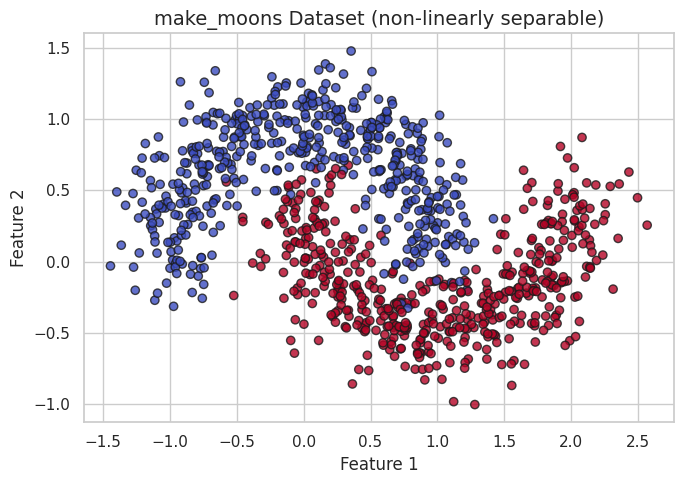

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(
    X[:, 0], X[:, 1],
    c=y,
    cmap="coolwarm",
    edgecolor="k",
    alpha=0.8
)
ax.set_title("make_moons Dataset (non-linearly separable)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.tight_layout()
plt.show()


## Why use the `make_moons` dataset?

The `make_moons` dataset creates two interlocking, crescent-shaped clusters. Because the classes curve around each other, there is **no straight line** that can cleanly separate them. This makes the problem deliberately non-linearly separable.

This dataset is widely used in SVM and kernel tutorials because it is two-dimensional (easy to visualise), clearly shows where a linear model fails, and highlights how non-linear kernels such as RBF and polynomial can wrap the decision boundary around each moon.


**Train–test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Train class counts:", np.bincount(y_train))
print("Test class counts:", np.bincount(y_test))


Train shape: (800, 2) (800,)
Test shape: (200, 2) (200,)
Train class counts: [400 400]
Test class counts: [100 100]


**Helper function to plot decision boundaries**

In [ ]:
def plot_decision_boundary(model, X, y, title):
    # Mesh grid over feature space
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Model predictions on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm",
               edgecolor="k", alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    plt.tight_layout()
    plt.show()


**Train a linear-kernel SVM**

In [ ]:
svm_linear = SVC(kernel="linear", C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

acc_linear = accuracy_score(y_test, y_pred_linear)
print("Linear kernel accuracy:", acc_linear)
print()
print("Classification report (linear kernel):")
print(classification_report(y_test, y_pred_linear))


Linear kernel accuracy: 0.915

Classification report (linear kernel):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.94      0.89      0.91       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



**Plot the linear SVM decision boundary**

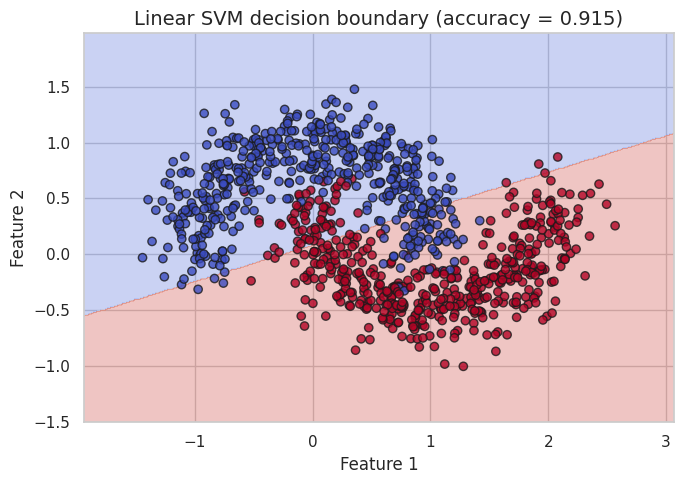

In [ ]:
plot_decision_boundary(
    svm_linear,
    X,
    y,
    f"Linear SVM decision boundary (accuracy = {acc_linear:.3f})"
)


### Interpreting the linear kernel decision boundary

The linear SVM draws an almost straight boundary that cuts across the two moons. It achieves reasonable accuracy because many points are still on the correct side, but several red points fall into the blue region and vice versa, especially near the overlapping middle area.

This plot illustrates the main limitation of the linear kernel: with only straight boundaries available, it cannot fully adapt to the curved geometry of the moons. This motivates the use of non-linear kernels that can bend the boundary.


**RBF kernel SVM**

In [ ]:
svm_rbf = SVC(kernel="rbf", C=1.0, gamma=1.0, random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF kernel accuracy:", acc_rbf)
print()
print("Classification report (RBF kernel):")
print(classification_report(y_test, y_pred_rbf))


RBF kernel accuracy: 0.99

Classification report (RBF kernel):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



**Plot the RBF decision boundary**

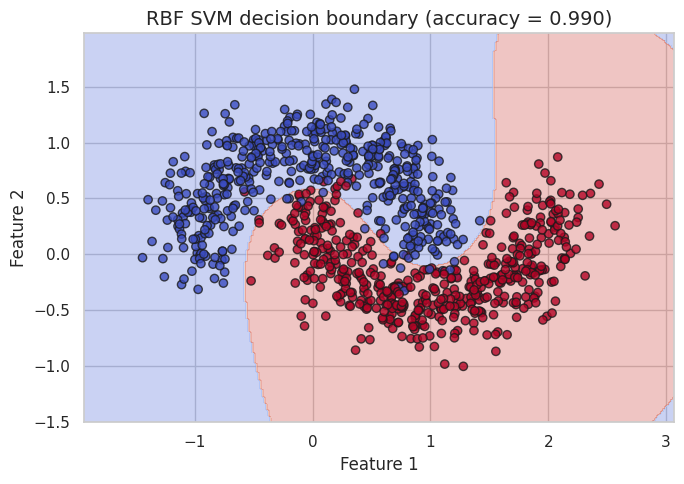

In [ ]:
plot_decision_boundary(
    svm_rbf,
    X,
    y,
    f"RBF SVM decision boundary (accuracy = {acc_rbf:.3f})"
)


### Interpreting the RBF kernel decision boundary

With the RBF kernel, the decision boundary bends smoothly around each moon. The red region tightly wraps the lower moon and the blue region wraps the upper moon, leaving only a few misclassified points in noisy overlap areas. This explains the jump in accuracy from the linear model to around 0.99.

The RBF kernel effectively measures locality: points are considered similar if they are close in the input space. This allows the SVM to create highly flexible, curved boundaries that follow the data structure, which is why RBF is often a strong default for non-linear problems.


**Polynomial kernel SVM**

In [ ]:
svm_poly = SVC(kernel="poly", degree=3, C=1.0, gamma=1.0, coef0=1.0, random_state=42)
svm_poly.fit(X_train, y_train)

y_pred_poly = svm_poly.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)
print("Polynomial kernel accuracy:", acc_poly)
print()
print("Classification report (polynomial kernel):")
print(classification_report(y_test, y_pred_poly))


Polynomial kernel accuracy: 0.985

Classification report (polynomial kernel):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.98      0.99      0.99       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



**Plot polynomial kernel decision boundary**

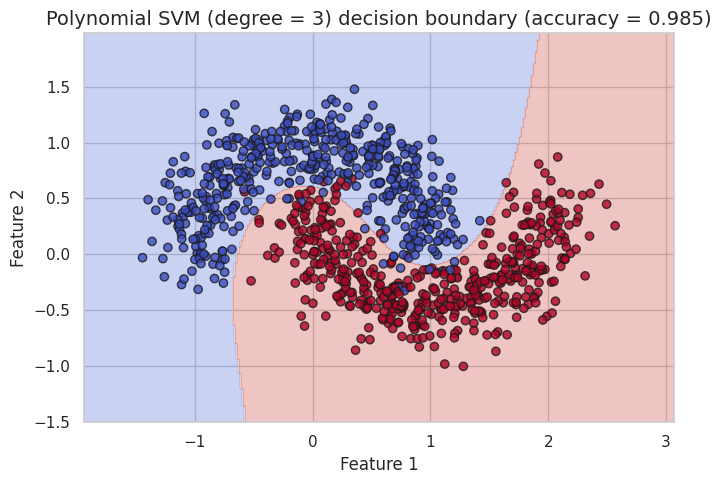

In [ ]:
plot_decision_boundary(
    svm_poly,
    X,
    y,
    f"Polynomial SVM (degree = 3) decision boundary (accuracy = {acc_poly:.3f})"
)


### Interpreting the polynomial kernel decision boundary

The polynomial kernel of degree 3 also produces a curved decision boundary that follows the moons well, achieving accuracy close to the RBF kernel. The boundary is smooth and global, bending to separate the two shapes while remaining relatively simple.

Polynomial kernels model interactions between features using polynomial terms. This gives them non-linear capacity without being as locally flexible as RBF, which can be beneficial when the underlying pattern is smooth and not extremely irregular.


**results table**

In [ ]:
import pandas as pd

results = pd.DataFrame({
    "kernel": ["linear", "rbf", "poly_deg3"],
    "test_accuracy": [acc_linear, acc_rbf, acc_poly]
})

results


,kernel,test_accuracy
0,linear,0.915
1,rbf,0.990
2,poly_deg3,0.985


In [ ]:
# Save metrics table
results.to_csv("svm_kernel_results.csv", index=False)

# Save decision boundary plots
for model, name, acc in [
    (svm_linear, "linear", acc_linear),
    (svm_rbf, "rbf", acc_rbf),
    (svm_poly, "poly_deg3", acc_poly),
]:
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm",
               edgecolor="k", alpha=0.8)
    ax.set_title(f"{name.upper()} kernel (accuracy = {acc:.3f})")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    plt.tight_layout()
    fig.savefig(f"svm_{name}_kernel_boundary.png", dpi=300)
    plt.close(fig)

print("Saved csv and png files.")


Saved csv and png files.


## Discussion: comparing linear, RBF, and polynomial kernels

On the `make_moons` dataset, the linear kernel performs worst because it is restricted to straight boundaries. It still reaches around 0.91 test accuracy, but clearly misclassifies points where the classes curve around one another, showing that linear SVMs are best suited to roughly linearly separable problems or very high-dimensional feature spaces where linear separation is more plausible.

Both the RBF and polynomial kernels significantly improve performance (around 0.99 and 0.985 accuracy respectively), because they allow the SVM to draw non-linear boundaries. The RBF kernel is highly flexible and can adapt to local patterns, which is why it is often the default recommendation for non-linear data. Polynomial kernels capture smoother, more global curvature and can work well when interactions between features can be described by low-degree polynomials.

In practice, a common strategy is to start with a linear kernel for simplicity and speed, then move to RBF when the data is clearly non-linear, and consider polynomial kernels if there is a reason to believe that polynomial feature interactions are important or if RBF overfits. Hyperparameters such as \(C\), \(\gamma\) (for RBF), and the polynomial degree should then be tuned using cross-validation.

## References

- Scikit-learn documentation: Support Vector Machines. https://scikit-learn.org/stable/modules/svm.html

- Scikit-learn documentation: `make_moons` dataset. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

- Article on the kernel trick in SVMs. https://www.geeksforgeeks.org/machine-learning/kernel-trick-in-support-vector-classification/

- Guide on choosing best SVM kernels.  https://www.geeksforgeeks.org/machine-learning/how-to-choose-the-best-kernel-function-for-svms/

- Tutorial on SVM kernels and non-linear data. https://www.freecodecamp.org/news/svm-kernels-how-to-tackle-nonlinear-data-in-machine-learning/


## Accessibility notes

To make this tutorial more accessible, all plots use a colorblind‑friendly palette via `sns.set_palette("colorblind")`, and axis labels/titles are rendered with larger font sizes for readability. In the final PDF or web page version of this tutorial, each figure will be accompanied by descriptive alt‑text so that screen‑reader users can understand the content of the plots.